In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')


from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
data = pd.read_csv('loan.csv')
data.shape

(614, 13)

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
data.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [7]:
data.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [8]:
data.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [9]:
data.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [10]:
data = data.drop('Loan_ID',axis = 1)


In [11]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [13]:
data.describe(include = ['object'])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


## analyse the missing values

In [14]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [15]:
data.shape

(614, 12)

In [16]:
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [24]:
df = data.copy()

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [26]:
df.dtypes 

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [27]:
# Catagorical Cols 
cat_cols = df.dtypes == "object"
cat_cols[cat_cols].index

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [28]:
# Numerical Cols 
num_cols = df.dtypes != "object"
num_cols[num_cols].index

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [34]:
# # Removing the dependent feture 
# cat_cols = 

In [35]:
target = 'Loan_Status'         # Target/Class Variable/Independent Variable 
df[target].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [36]:
df[target].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<Axes: xlabel='Loan_Status', ylabel='count'>

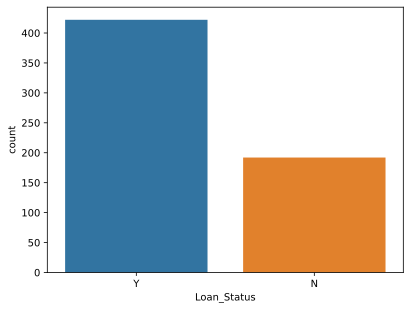

In [37]:
sns.countplot(data=df, x=target)

In [38]:
# P(Acceptance) ~ 69% 
# P(Rejection) ~ 31%

In [39]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


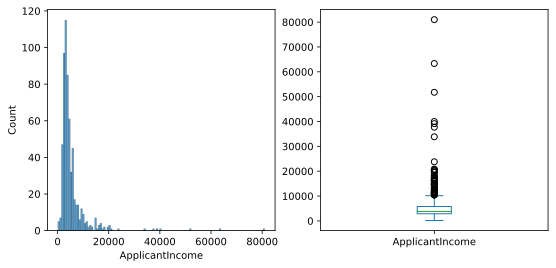

In [40]:
plt.subplot(121)
sns.histplot(df['ApplicantIncome'])

plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(9,4))

plt.show()

<Axes: xlabel='ApplicantIncome', ylabel='Count'>

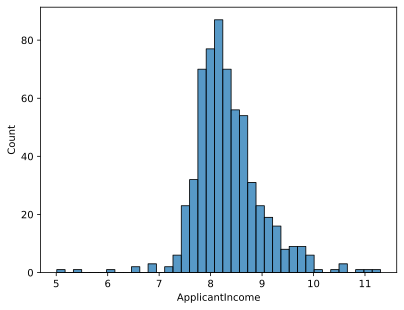

In [41]:
sns.histplot(np.log(df['ApplicantIncome']))

In [42]:
df[['ApplicantIncome', 'Loan_Status']]

,ApplicantIncome,Loan_Status
0,5849,Y
1,4583,N
2,3000,Y
3,2583,Y
4,6000,Y
...,...,...
609,2900,Y
610,4106,Y
611,8072,Y
612,7583,Y


In [43]:
df.groupby('Loan_Status')['ApplicantIncome'].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

In [44]:
from scipy import stats

# Ho = ApplicantIncome and Loan status are independent 
# Ha = ApplicantIncome and Loan status are not independent 

stats.ttest_ind(df[df[target] =="Y"]["ApplicantIncome"],
                df[df[target] =="N"]["ApplicantIncome"])

# p value is very high so I cant reject H0 ; ApplicantIncome and Loan status are independent 

Ttest_indResult(statistic=-0.11650844828724542, pvalue=0.907287812130518)

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

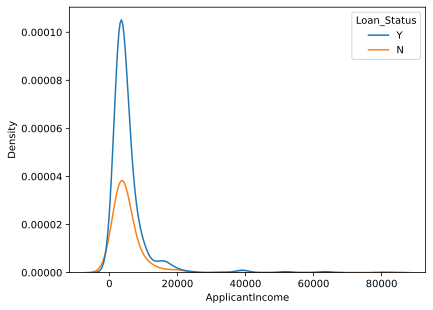

In [45]:
sns.kdeplot(data = df[['ApplicantIncome', 'Loan_Status']], 
            x = 'ApplicantIncome', 
            hue = 'Loan_Status')

In [46]:
def feature_selector(df, col_name):
    
    alpha = 0.05
    
    _, p_value = stats.ttest_ind(df[df[target] =="Y"][col_name],
                                 df[df[target] =="N"][col_name])
    
    if p_value < alpha:
        print(f"{col_name} is a good feature") 
    else:
        print(f"{col_name} is a bad feature") 
    
    

In [47]:
feature_selector(df, 'ApplicantIncome')

ApplicantIncome is a bad feature


In [48]:
feature_selector(df, 'LoanAmount')

LoanAmount is a bad feature


In [49]:
# Create a contingency table
contingency_table = pd.crosstab(
    df['Credit_History'], df[target]
)

In [50]:
contingency_table

Loan_Status,N,Y
Credit_History,,
0.0,82,7
1.0,97,378


In [51]:
# Ho = Credit_History and Loan status are independent 
# Ha = Credit_History and Loan status are not independent 

scipy.stats.chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=174.63729658142535, pvalue=7.184759548750746e-40, dof=1, expected_freq=array([[ 28.2464539,  60.7535461],
       [150.7535461, 324.2464539]]))

In [52]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

In [53]:
feature_selector(df, 'TotalIncome')

TotalIncome is a bad feature


In [54]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term']/12

In [55]:
df['Loan_Amount_per_year'] = df['LoanAmount']*1000/df['Loan_Amount_Term']

In [56]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan_Amount_per_year
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,4266.666667
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,2200.000000
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,4000.000000
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,4700.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,30.0,1.0,Rural,Y,2900.0,2366.666667
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,15.0,1.0,Rural,Y,4106.0,2666.666667
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,30.0,1.0,Urban,Y,8312.0,8433.333333
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,30.0,1.0,Urban,Y,7583.0,6233.333333


In [57]:
df['emi'] = df['Loan_Amount_per_year']/12

In [58]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan_Amount_per_year,emi
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,NaN,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,4266.666667,355.555556
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,2200.000000,183.333333
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,4000.000000,333.333333
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,4700.000000,391.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,30.0,1.0,Rural,Y,2900.0,2366.666667,197.222222
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,15.0,1.0,Rural,Y,4106.0,2666.666667,222.222222
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,30.0,1.0,Urban,Y,8312.0,8433.333333,702.777778
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,30.0,1.0,Urban,Y,7583.0,6233.333333,519.444444


In [59]:
(df['TotalIncome']* 0.3 > df['emi']).astype('int')

0      0
1      1
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    1
Length: 614, dtype: int64

In [60]:
df["Able_to_pay"] = (df['TotalIncome']* 0.3 > df['emi']).astype('int')

In [61]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan_Amount_per_year,emi,Able_to_pay
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,4266.666667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,2200.000000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,4000.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,4700.000000,391.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,30.0,1.0,Rural,Y,2900.0,2366.666667,197.222222,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,15.0,1.0,Rural,Y,4106.0,2666.666667,222.222222,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,30.0,1.0,Urban,Y,8312.0,8433.333333,702.777778,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,30.0,1.0,Urban,Y,7583.0,6233.333333,519.444444,1


In [62]:
# Create a contingency table
contingency_table = pd.crosstab(
    df['Able_to_pay'], df[target], normalize='index'
)

In [63]:
contingency_table

Loan_Status,N,Y
Able_to_pay,,
0,0.475000,0.525000
1,0.301394,0.698606


In [64]:
contingency_table = pd.crosstab(
    df['Able_to_pay'], df[target]
)

In [65]:
# Ho = Able_to_pay and Loan status are independent 
# Ha = Able_to_pay and Loan status are not independent 

scipy.stats.chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=4.467271867611989, pvalue=0.03455011506195388, dof=1, expected_freq=array([[ 12.50814332,  27.49185668],
       [179.49185668, 394.50814332]]))

In [66]:
# p_value < alpha 
# Reject Ho, so this is a nice feature 


In [67]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan_Amount_per_year,emi,Able_to_pay
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,4266.666667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,2200.000000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,4000.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,4700.000000,391.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,30.0,1.0,Rural,Y,2900.0,2366.666667,197.222222,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,15.0,1.0,Rural,Y,4106.0,2666.666667,222.222222,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,30.0,1.0,Urban,Y,8312.0,8433.333333,702.777778,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,30.0,1.0,Urban,Y,7583.0,6233.333333,519.444444,1


# Q1. Loan amount payable

In [94]:
group1 = df[df['Gender']=='Female']
group2 = df[(df['Gender']=='Male') & (df['Married'] == 'No')]


In [95]:
print('Group 1 variance:', group1['Loan_Amount_per_year'].var())
print('Group 2 variance:', group2['Loan_Amount_per_year'].var())


Group 1 variance: 32469575.950883474
Group 2 variance: 16361823.595006438


In [96]:
from scipy.stats import levene, ttest_ind, kruskal_test

levene_test = levene(group1['Loan_Amount_per_year'].dropna(), group2['Loan_Amount_per_year'].dropna(), center='median')
print('Levene test p-value:', levene_test.pvalue)


Levene test p-value: 0.8674541435146872


In [97]:
t_test = ttest_ind(group1['Loan_Amount_per_year'].dropna(), group2['Loan_Amount_per_year'].dropna(), equal_var=True)
print('T-test p-value:', t_test.pvalue)


T-test p-value: 0.8220131093962627


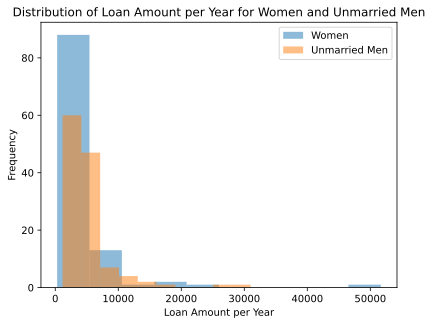

In [98]:
import matplotlib.pyplot as plt

# Plotting loan amount per year for group 1 (women loan applicants)
plt.hist(group1['Loan_Amount_per_year'].dropna(), bins=10, alpha=0.5, label='Women')
# Plotting loan amount per year for group 2 (unmarried male applicants)
plt.hist(group2['Loan_Amount_per_year'].dropna(), bins=10, alpha=0.5, label='Unmarried Men')

plt.xlabel('Loan Amount per Year')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount per Year for Women and Unmarried Men')
plt.legend()
plt.show()


# Q2. Rejected for a loan


In [159]:
from scipy.stats import levene, ttest_ind, kruskal


In [116]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan_Amount_per_year,emi,Able_to_pay
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,5849.0,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,6091.0,4266.666667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,3000.0,2200.000000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,4941.0,4000.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,6000.0,4700.000000,391.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,30.0,1.0,Rural,Y,2900.0,2366.666667,197.222222,1
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,15.0,1.0,Rural,Y,4106.0,2666.666667,222.222222,1
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,30.0,1.0,Urban,Y,8312.0,8433.333333,702.777778,1
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,30.0,1.0,Urban,Y,7583.0,6233.333333,519.444444,1


In [152]:
group1 = df[(df['Married']=='No')  & (df['Credit_History'] == 1.0) & (df['Loan_Status'] == 'N')]['LoanAmount'].dropna()
group2 = df[(df['Married']=='Yes') & (df['Credit_History'] == 1.0) & (df['Loan_Status'] == 'N')]['LoanAmount'].dropna()

print('Group 1 variance:', group1.var())
print('Group 2 variance:', group2.var())

Group 1 variance: 7901.813953488371
Group 2 variance: 10138.542109929074


In [153]:
levene_test = levene(group1, group2)
print('Levene test p-value:', levene_test.pvalue)

Levene test p-value: 0.777602001365163


In [160]:
kruskal_test = kruskal(group1, group2)
print('Kruskal-Wallis test p-value:', kruskal_test.pvalue)


Kruskal-Wallis test p-value: 0.02444857687829343


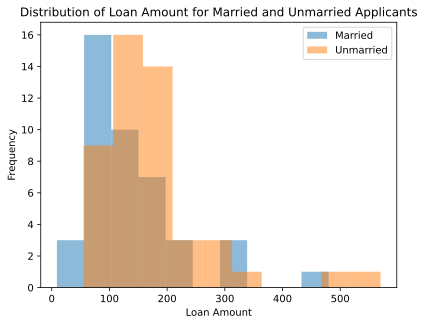

In [161]:
import matplotlib.pyplot as plt

# Plotting loan amount for group 1 (married)
plt.hist(group1, bins=10, alpha=0.5, label='Married')
# Plotting loan amount for group 2 (unmarried)
plt.hist(group2, bins=10, alpha=0.5, label='Unmarried')

plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Loan Amount for Married and Unmarried Applicants')
plt.legend()
plt.show()


# Q3. Compare the applicant incomes

In [258]:
import pandas as pd
from scipy.stats import levene, f_oneway, chi2_contingency


In [187]:
group1 = df[(df['Credit_History'] == 0.0) & (df['Loan_Status'] == 'N')]['ApplicantIncome'].dropna()
group2 = df[(df['Credit_History'] == 1.0) & (df['Loan_Status'] == 'N')]['ApplicantIncome'].dropna()

print('Group 1 variance:', group1.var())
print('Group 2 variance:', group2.var())

Group 1 variance: 79052961.12270401
Group 2 variance: 24745931.484321307


In [188]:
kruskal_test = kruskal(group1, group2)
print('Kruskal-Wallis test p-value:', kruskal_test.pvalue)

Kruskal-Wallis test p-value: 0.15224584555807225


In [189]:
levene_test = levene(group1, group2, center='trimmed')
print('Levene test p-value:', levene_test.pvalue)

Levene test p-value: 0.02764197697190895


# Q4. Female applicant


In [279]:
group1 = df[(df['Gender']=='Female') & (df['Loan_Status'] == 'N') ].dropna()
group2 = df[(df['Gender']=='Male') & (df['Loan_Status'] == 'N') ].dropna()

In [280]:
group1.shape, group2.shape

((32, 16), (116, 16))

In [281]:
combined_df = pd.concat([group1, group2], axis=0)
combined_df.shape

(148, 16)

In [282]:
combined_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,Loan_Amount_per_year,emi,Able_to_pay
17,Female,No,0,Graduate,No,3510,0.0,76.0,30.0,0.0,Urban,N,3510.0,2533.333333,211.111111,1
48,Female,Yes,0,Graduate,No,2645,3440.0,120.0,30.0,0.0,Urban,N,6085.0,4000.000000,333.333333,1
52,Female,No,0,Graduate,No,4230,0.0,112.0,30.0,1.0,Semiurban,N,4230.0,3733.333333,311.111111,1
54,Female,Yes,1,Graduate,Yes,11500,0.0,286.0,30.0,0.0,Urban,N,11500.0,9533.333333,794.444444,1
64,Female,No,0,Graduate,No,4166,0.0,116.0,30.0,0.0,Semiurban,N,4166.0,3866.666667,322.222222,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,Male,Yes,1,Graduate,No,2787,1917.0,146.0,30.0,0.0,Rural,N,4704.0,4866.666667,405.555556,1
585,Male,Yes,1,Graduate,No,4283,3000.0,172.0,7.0,1.0,Rural,N,7283.0,24571.428571,2047.619048,1
589,Male,Yes,2,Graduate,Yes,2726,0.0,106.0,30.0,0.0,Semiurban,N,2726.0,3533.333333,294.444444,1
591,Male,Yes,2,Graduate,Yes,6000,0.0,205.0,20.0,1.0,Semiurban,N,6000.0,10250.000000,854.166667,1


In [283]:
# Create a contingency table
contingency_table = pd.crosstab(
    combined_df['Gender'], df['Credit_History'], normalize='index'
)

In [284]:
contingency_table

Credit_History,0.0,1.0
Gender,,
Female,0.406250,0.593750
Male,0.431034,0.568966


In [285]:
# Create a contingency table
contingency_table = pd.crosstab(
    combined_df['Gender'], df['Credit_History']
)
contingency_table

Credit_History,0.0,1.0
Gender,,
Female,13,19
Male,50,66


In [286]:
scipy.stats.chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=0.0024123442480440483, pvalue=0.9608271544968046, dof=1, expected_freq=array([[13.62162162, 18.37837838],
       [49.37837838, 66.62162162]]))

# Q5. Gender bias

In [288]:
group1 = df[(df['Gender']=='Female') & (df['Credit_History'] == 1.0) ].dropna()
group2 = df[(df['Gender']=='Male') & (df['Credit_History'] == 1.0) ].dropna()

combined_df = pd.concat([group1, group2], axis=0)
combined_df.shape

(410, 16)

In [289]:
# Create a contingency table
contingency_table = pd.crosstab(
    combined_df['Gender'], df['Loan_Status'], normalize='index'
)

In [290]:
contingency_table

Loan_Status,N,Y
Gender,,
Female,0.263889,0.736111
Male,0.195266,0.804734


In [292]:
# Create a contingency table
contingency_table = pd.crosstab(
    combined_df['Gender'], df['Loan_Status'], 
)
contingency_table

Loan_Status,N,Y
Gender,,
Female,19,53
Male,66,272


In [293]:
scipy.stats.chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=1.3089034809797073, pvalue=0.25259328208262877, dof=1, expected_freq=array([[ 14.92682927,  57.07317073],
       [ 70.07317073, 267.92682927]]))

# Module Exam

In [7]:
alpha = 0.05
sigma = 188 / (n * 0.5)
mu = 1000

In [8]:
sigma

20.88888888888889

In [10]:
x = [886, 633, 943, 847, 934, 841, 1193, 820, 774, 834, 1050, 1058, 1192, 975, 1313, 872, 1079, 809]


In [15]:
z_score = (sample_mean - population_mean) / (population_std / (sample_size ** 0.5))

In [79]:
import scipy.stats as stats
import numpy as np

data = np.array([886, 633, 943, 847, 934, 841, 1193, 820, 774, 834, 1050, 1058, 1192, 975, 1313, 872, 1079, 809])

sample_mean = np.mean(data)
sample_size = len(data)
population_std = 188
significance_level = 0.05
recommended_value = 1000

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(data, recommended_value)

# Compute the one-tailed p-value
p_value = p_value / 2

print("One-sample t-test:")
print("T-statistic:", t_statistic)
print("p-value:", p_value)


One-sample t-test:
T-statistic: -1.2978124341081247
p-value: 0.10584288438553081


In [80]:
import scipy.stats as stats
import numpy as np

data = np.array([886, 633, 943, 847, 934, 841, 1193, 820, 774, 834, 1050, 1058, 1192, 975, 1313, 872, 1079, 809])

sample_mean = np.mean(data)
sample_size = len(data)
population_std = 188
significance_level = 0.05
recommended_value = 1000

# Perform one-sample t-test
t_statistic, p_value = stats.ttest_1samp(data, recommended_value)

# Compute the one-tailed p-value
p_value = p_value / 2

print("One-sample t-test:")
print("T-statistic:", t_statistic)
print("p-value:", p_value)


One-sample t-test:
T-statistic: -1.2978124341081247
p-value: 0.10584288438553081


In [11]:
import scipy.stats as stats

population_mean = 1000  # Population average height
population_std = 188  # Population standard deviation
sample_mean = np.mean(x)  # Sample average height
sample_size = len(x)  # Sample size

# Calculate the Z-score (test statistic)
z_score = (sample_mean - population_mean) / (population_std / (sample_size ** 0.5))

# Calculate the p-value
p_value = stats.norm.cdf(z_score)

alpha = 0.05  # Significance level

# Compare the p-value with the significance level
if p_value < alpha:
    conclusion = "Reject the null hypothesis. People from the state are shorter."
else:
    conclusion = "Fail to reject the null hypothesis. People from the state are not shorter."

print("Z-score:", z_score)
print("p-value:", p_value)
print(conclusion)

Z-score: -1.1872874499710284
p-value: 0.11755712833941645
Fail to reject the null hypothesis. People from the state are not shorter.


In [14]:
import numpy as np
import scipy.stats as stats

# Given data
data = np.array([886, 633, 943, 847, 934, 841, 1193, 820, 774, 834, 1050, 1058, 1192, 975, 1313, 872, 1079, 809])
pop_std_dev = 188  # population standard deviation
µ0 = 1000 # replace this with actual value

# Sample mean
sample_mean = np.mean(data)

# Sample size
n = len(data)

# Z-score
z = (sample_mean - µ0) / (pop_std_dev / np.sqrt(n))

# One-tailed test (less than)
p = stats.norm.cdf(z)

print(f'Z-score: {z}, p-value: {p}')


Z-score: -1.1872874499710284, p-value: 0.11755712833941645


# Q5

In [16]:
import scipy.stats as stats

# Observed frequencies
observed = [13000, 9000, 15000, 3000, 14000, 6000]

# Expected frequencies (for a fair die)
expected = [10000, 10000, 10000, 10000, 10000, 10000]  # 60,000 rolls / 6 outcomes

# Chi-square test
chi2, p = stats.chisquare(observed, expected)

print(f'Chi-square statistic: {chi2}, p-value: {p}')


Chi-square statistic: 11600.0, p-value: 0.0


In [17]:
0 < 0.01

True

In [18]:
import pandas as pd
import numpy as np

# Create a dummy DataFrame
data = {
    'total_bill': [50, 30, 60, 40, 70, 80, 45, 55],
    'tip': [10, 6, 15, 8, 14, 16, 9, 11],
    'smoker': ['No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes']
}

df = pd.DataFrame(data)



In [59]:
import pandas as pd
import numpy as np

def tip_percentage(df):

    # Calculate the tip percentage
    df['percentage'] = np.round((df['tip'] / df['total_bill']) * 100, 2)

    # Group by the 'smoker' column and calculate mean percentage
    average_tip_percentage = df.groupby('smoker')['percentage'].mean()
    print(average_tip_percentage)
    # Print out the category with the higher average percentage
    print(average_tip_percentage.idxmax())
    
    return df, average_tip_percentage

In [60]:
# Create a dummy DataFrame
data = {
    'total_bill': [16.99, 10.34, 21.01, 23.68, 24.59 ],
    'tip': [1.01, 1.66, 3.50, 3.31, 3.61],
    'smoker': ['No', 'Yes', 'No', 'No', 'No']
}

df = pd.DataFrame(data)

In [61]:
df_a, avg_a = tip_percentage(df)

smoker
No     12.815
Yes    16.050
Name: percentage, dtype: float64
Yes


In [62]:
df_a

,total_bill,tip,smoker,percentage
0,16.99,1.01,No,5.94
1,10.34,1.66,Yes,16.05
2,21.01,3.50,No,16.66
3,23.68,3.31,No,13.98
4,24.59,3.61,No,14.68


In [63]:
type(avg_a)

pandas.core.series.Series

In [64]:
df_a.groupby('smoker')['percentage'].mean().idxmax()

'Yes'

In [68]:
df_a.groupby('smoker')['percentage'].mean().i

smoker
No     12.815
Yes    16.050
Name: percentage, dtype: float64

In [69]:
def tip_percentage(df):
    '''
    Input:
    df -> The input tips data
    
    Output:
    Return the smoker category
    '''
    # Your Code Starts here
    
    # Calculating the percentage
    df['percentage'] = np.round((df['tip'] / df['total_bill'])*100, 2)
    
    # Finding the mean
    avg_tip_per = df.groupby('smoker')['percentage'].mean()
    
    # final category
    category = avg_tip_per.idxmax()

    return category

In [70]:
df

,total_bill,tip,smoker,percentage
0,16.99,1.01,No,5.94
1,10.34,1.66,Yes,16.05
2,21.01,3.50,No,16.66
3,23.68,3.31,No,13.98
4,24.59,3.61,No,14.68


In [71]:
tip_percentage(df)

'Yes'

# Q1

In [72]:
Healthcare = [9.7,
6.7,
3.7,
9.5,
6.6,
3.3,
7.6,
4.6,
3.0,
6.8,
3.9,
0.8,
6.7,
3.9,
-9.9]
Technology = [6.5,
4.6,
2.9,
6.4,
4.6,
2.8,
6.4,
4.2,
2.7,
6.2,
3.6,
2.5,
4.9,
3.2]

In [73]:
Healthcare = [9.7, 6.7, 3.7, 9.5, 6.6, 3.3, 7.6, 4.6, 3.0, 6.8, 3.9, 0.8, 6.7, 3.9, -9.9]
 

[9.7, 6.7, 3.7, 9.5, 6.6, 3.3, 7.6, 4.6, 3.0, 6.8, 3.9, 0.8, 6.7, 3.9, -9.9]

In [75]:
Technology = [6.5, 4.6, 2.9, 6.4, 4.6, 2.8, 6.4, 4.2, 2.7, 6.2, 3.6, 2.5, 4.9, 3.2]


In [76]:
import scipy.stats as stats

healthcare = [9.7, 6.7, 3.7, 9.5, 6.6, 3.3, 7.6, 4.6, 3.0, 6.8, 3.9, 0.8, 6.7, 3.9, -9.9]
technology = [6.5, 4.6, 2.9, 6.4, 4.6, 2.8, 6.4, 4.2, 2.7, 6.2, 3.6, 2.5, 4.9, 3.2]

# Perform a two-sample t-test to compare mean returns
t_stat, p_val_t = stats.ttest_ind(healthcare, technology)

# Perform Levene's test to compare variances
levene_stat, p_val_levene = stats.levene(healthcare, technology)

print(f"T-test p-value: {p_val_t}, Levene's test p-value: {p_val_levene}")


T-test p-value: 0.9595604170457832, Levene's test p-value: 0.08274976336015841


In [77]:
import scipy.stats as stats
import numpy as np

# Define the returns for healthcare and technology
healthcare_returns = np.array([9.7, 6.7, 3.7, 9.5, 6.6, 3.3, 7.6, 4.6, 3.0, 6.8, 3.9, 0.8, 6.7, 3.9, -9.9])
technology_returns = np.array([6.5, 4.6, 2.9, 6.4, 4.6, 2.8, 6.4, 4.2, 2.7, 6.2, 3.6, 2.5, 4.9, 3.2])

# Perform t-test for comparing mean returns
t_statistic, p_value = stats.ttest_ind(healthcare_returns, technology_returns)
print("T-test for comparing mean returns:")
print("T-statistic:", t_statistic)
print("p-value:", p_value)

# Perform ANOVA test for variance
f_statistic, p_value = stats.f_oneway(healthcare_returns, technology_returns)
print("\nANOVA for variance:")
print("F-statistic:", f_statistic)
print("p-value:", p_value)


T-test for comparing mean returns:
T-statistic: 0.051178022111020766
p-value: 0.9595604170457832

ANOVA for variance:
F-statistic: 0.0026191899471962247
p-value: 0.9595604170457732


In [78]:
import scipy.stats as stats
import numpy as np

# Define the returns for healthcare and technology
healthcare_returns = np.array([9.7, 6.7, 3.7, 9.5, 6.6, 3.3, 7.6, 4.6, 3.0, 6.8, 3.9, 0.8, 6.7, 3.9, -9.9])
technology_returns = np.array([6.5, 4.6, 2.9, 6.4, 4.6, 2.8, 6.4, 4.2, 2.7, 6.2, 3.6, 2.5, 4.9, 3.2])

# Perform t-test for comparing mean returns
t_statistic, p_value = stats.ttest_ind(healthcare_returns, technology_returns)
print("T-test for comparing mean returns:")
print("T-statistic:", t_statistic)
print("p-value:", p_value)

# Perform Levene's test for variance
statistic, p_value = stats.levene(healthcare_returns, technology_returns)
print("\nLevene's test for variance:")
print("Test statistic:", statistic)
print("p-value:", p_value)


T-test for comparing mean returns:
T-statistic: 0.051178022111020766
p-value: 0.9595604170457832

Levene's test for variance:
Test statistic: 3.246582207444098
p-value: 0.08274976336015841
